In [1]:
# Import required libraries
# https://www.datacamp.com/community/tutorials/introduction-factor-analysis
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("bfi.csv")
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

Unnamed: 0   A1   A2   A3   A4   A5   C1   C2   C3   C4  ...   N1   N2  \
0       61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  ...  3.0  4.0   
1       61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  ...  3.0  3.0   
2       61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  ...  4.0  5.0   
3       61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  ...  2.0  5.0   
4       61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  ...  2.0  3.0   

    N3   N4   N5   O1  O2   O3   O4   O5  
0  2.0  2.0  3.0  3.0   6  3.0  4.0  3.0  
1  3.0  5.0  5.0  4.0   2  4.0  3.0  3.0  
2  4.0  2.0  3.0  4.0   2  5.0  5.0  2.0  
3  2.0  4.0  1.0  3.0   3  4.0  3.0  5.0  
4  4.0  4.0  3.0  3.0   3  4.0  3.0  3.0  

[5 rows x 26 columns]

In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.19955392497, 0.0)

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8482210116350438

### Choose number of factors

In [10]:
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='varimax')
fa.fit(df)
# loadings = fa.loadings_

ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

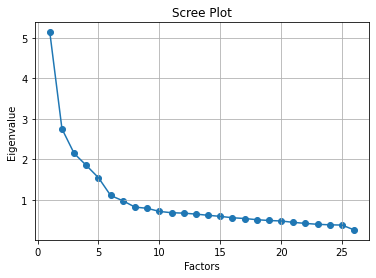

In [11]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [14]:
# fa.get_factor_variance()